# City of Los Angeles CA. Data on crime reports since 2010
## 10k
### Dataset for this Notebook:
[LA CRIME SOURCE DATA](https://catalog.data.gov/dataset/crime-data-from-2010-to-present)

---------------------------------
### Example with the 10000 most recent crimes from the Source Data

----------------

In [121]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import time
import matplotlib.pyplot as plt

import diffs_latlong
from diffs_latlong import computeNearestZip

csv_file = "Resources/Crime_Data_from_2010_to_Present.csv"


In [122]:
crime_df = pd.read_csv(csv_file)

In [123]:
crime_df.tail(2)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
1972132,191005089,01/26/2019,01/01/2010,1000,10,West Valley,1029,354,THEFT OF IDENTITY,1822 0377,...,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,7000 WOODLEY AV,NaN,"(34.1976, -118.4837)"
1972133,191505220,01/24/2019,01/05/2010,700,15,N Hollywood,1555,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",1202 0701,...,NaN,IC,Invest Cont,341.0,NaN,NaN,NaN,5000 LANKERSHIM BL,NaN,"(34.1611, -118.3723)"


In [125]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972134 entries, 0 to 1972133
Data columns (total 26 columns):
DR Number                 int64
Date Reported             object
Date Occurred             object
Time Occurred             int64
Area ID                   int64
Area Name                 object
Reporting District        int64
Crime Code                int64
Crime Code Description    object
MO Codes                  object
Victim Age                int64
Victim Sex                object
Victim Descent            object
Premise Code              float64
Premise Description       object
Weapon Used Code          float64
Weapon Description        object
Status Code               object
Status Description        object
Crime Code 1              float64
Crime Code 2              float64
Crime Code 3              float64
Crime Code 4              float64
Address                   object
Cross Street              object
Location                  object
dtypes: float64(6), int64(6),

In [124]:
crime_df.count()

DR Number                 1972134
Date Reported             1972134
Date Occurred             1972134
Time Occurred             1972134
Area ID                   1972134
Area Name                 1972134
Reporting District        1972134
Crime Code                1972134
Crime Code Description    1972134
MO Codes                  1758170
Victim Age                1972134
Victim Sex                1765819
Victim Descent            1765776
Premise Code              1972084
Premise Description       1972009
Weapon Used Code           659952
Weapon Description         659951
Status Code               1972131
Status Description        1972134
Crime Code 1              1972125
Crime Code 2               128498
Crime Code 3                 3186
Crime Code 4                   96
Address                   1972134
Cross Street               329875
Location                  1972134
dtype: int64

In [126]:
# Make additional column to hold dates formatted to datetime
crime_df['date reported formatted'] = pd.to_datetime(crime_df['Date Reported'], infer_datetime_format=True)

In [127]:
crime_df.tail(2)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,date reported formatted
1972132,191005089,01/26/2019,01/01/2010,1000,10,West Valley,1029,354,THEFT OF IDENTITY,1822 0377,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7000 WOODLEY AV,NaN,"(34.1976, -118.4837)",2019-01-26
1972133,191505220,01/24/2019,01/05/2010,700,15,N Hollywood,1555,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",1202 0701,...,IC,Invest Cont,341.0,NaN,NaN,NaN,5000 LANKERSHIM BL,NaN,"(34.1611, -118.3723)",2019-01-24


In [129]:
# Move the new column to the first position for readability
# First make a list of the column names
cols = list(crime_df.columns)

In [130]:
# Move the new column to first position
cols =a cols[-1:] + cols[:-1]

In [ ]:
cols

In [132]:
# Make new df with new column order
crime_df = crime_df[cols]

In [15]:
crime_df[:2]

,date reported formatted,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,2010-09-13,11401303,09/13/2010,09/12/2010,45,14,Pacific,1485,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,"(33.9599, -118.3962)"
1,2010-08-09,70309629,08/09/2010,08/09/2010,1515,13,Newton,1324,946,OTHER MISCELLANEOUS CRIME,...,NaN,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,"(34.0224, -118.2524)"


In [133]:
crime_df.columns

Index(['date reported formatted', 'DR Number', 'Date Reported',
       'Date Occurred', 'Time Occurred', 'Area ID', 'Area Name',
       'Reporting District', 'Crime Code', 'Crime Code Description',
       'MO Codes', 'Victim Age', 'Victim Sex', 'Victim Descent',
       'Premise Code', 'Premise Description', 'Weapon Used Code',
       'Weapon Description', 'Status Code', 'Status Description',
       'Crime Code 1', 'Crime Code 2', 'Crime Code 3', 'Crime Code 4',
       'Address', 'Cross Street', 'Location '],
      dtype='object')

In [134]:
# The 'Location ' column has a blank space at the end
crime_df = crime_df.rename(columns={"Location ": "location"})

In [135]:
# Inspect the new location column
crime_df.columns[-1]

'location'

In [19]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972134 entries, 0 to 1972133
Data columns (total 27 columns):
date reported formatted    datetime64[ns]
DR Number                  int64
Date Reported              object
Date Occurred              object
Time Occurred              int64
Area ID                    int64
Area Name                  object
Reporting District         int64
Crime Code                 int64
Crime Code Description     object
MO Codes                   object
Victim Age                 int64
Victim Sex                 object
Victim Descent             object
Premise Code               float64
Premise Description        object
Weapon Used Code           float64
Weapon Description         object
Status Code                object
Status Description         object
Crime Code 1               float64
Crime Code 2               float64
Crime Code 3               float64
Crime Code 4               float64
Address                    object
Cross Street               ob

In [136]:
# Regex to extract lat and long out of the location column
# and make 2 new columns from the values.

crime_df[['lat', 'long']] = crime_df['location'].replace\
    (to_replace=["\)","\("], value="", regex=True).str.split(",", expand = True)

In [137]:
# Inspect the new columns
crime_df.iloc[-3:,-5:]

,Address,Cross Street,location,lat,long
1972131,69TH ST,DENKER AV,"(33.977, -118.3046)",33.977,-118.3046
1972132,7000 WOODLEY AV,NaN,"(34.1976, -118.4837)",34.1976,-118.4837
1972133,5000 LANKERSHIM BL,NaN,"(34.1611, -118.3723)",34.1611,-118.3723


In [138]:
# Convert lat and longs to numeric values: 
# Needed for the computeNearestZip function(Extract zip from lat long)
crime_df['lat'] = pd.to_numeric(crime_df['lat'])
crime_df['long'] = pd.to_numeric(crime_df['long'])

In [139]:
type(crime_df['lat'][0]), type(crime_df['long'][0])

(numpy.float64, numpy.float64)

In [142]:
# Inspect the latest record date in df
crime_df.loc[crime_df['Date Reported']>= '01/01/2019'].sort_values(by= ['Date Reported'], ascending=False).head(2)

,date reported formatted,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,...,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,location,lat,long
1153466,2018-12-31,191604475,12/31/2018,12/26/2018,600,16,Foothill,1617,480,BIKE - STOLEN,...,Invest Cont,480.0,NaN,NaN,NaN,8900 RIDERWOOD DR,NaN,"(34.2648, -118.3261)",34.2648,-118.3261
1067458,2018-12-31,181401256,12/31/2018,12/30/2018,1600,14,Pacific,1428,330,BURGLARY FROM VEHICLE,...,Invest Cont,330.0,NaN,NaN,NaN,10900 PALMS BL,NaN,"(34.0265, -118.4184)",34.0265,-118.4184


In [152]:
# Inspect for the newest records again to see if any changes occurred after formatting the dates
# Ran this on 5/22/2019 with a fresh download of the csv and it appears the data set is updated frequently
crime_df.sort_values(by= 'date reported formatted', ascending=False).iloc[:3,:6]


,date reported formatted,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID
1150084,2019-05-20,190113994,05/20/2019,05/18/2018,2215,1
1208618,2019-05-20,191412593,05/20/2019,05/08/2019,1622,14
1171316,2019-05-20,190410061,05/20/2019,05/19/2019,2100,4


In [153]:
# Inspect result of sorting with old date format
crime_df.sort_values(by= 'Date Reported', ascending=False).iloc[:3,:6]


,date reported formatted,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID
1150297,2018-12-31,190304091,12/31/2018,12/31/2018,1500,3
941019,2018-12-31,180131482,12/31/2018,12/31/2018,1545,1
1150311,2018-12-31,190304225,12/31/2018,10/12/2018,1,3


In [154]:
# Sortig results change
max(crime_df['Date Reported']), max(crime_df['date reported formatted'])

('12/31/2018', Timestamp('2019-05-20 00:00:00'))

In [155]:
# Test if the old format returns results for the latest report with a 
# different logic test
crime_df[crime_df['Date Reported'] == '05/20/2019']\
    .sort_values(by='Date Reported', ascending=False).iloc[:2,:6]


,date reported formatted,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID
927989,2019-05-20,191511214,05/20/2019,05/19/2017,1700,15
1215238,2019-05-20,191609227,05/20/2019,05/19/2019,2300,16


### Examining the structure of the dataframe

In [156]:
len(crime_df.columns)

29

In [157]:
crime_df.shape

(1972134, 29)

In [158]:
# 15 columns that have no missing values at all
crime_df.dropna(axis=1).shape

(1972134, 16)

In [159]:
# only 19 rows out of 1967976 are without missing values
crime_df.dropna(axis=0).shape

(19, 29)

In [160]:
print(f"Total rows in age column: {crime_df['Victim Age'].count()}")
print(f"Total rows with age == 0: {crime_df[crime_df['Victim Age']==0]['Victim Age'].count()}")
print("Rows with age == 0:",\
     round(float(crime_df[crime_df['Victim Age']==0]['Victim Age']\
                  .count()/crime_df['Victim Age'].count()*100),2), '%')



Total rows in age column: 1972134
Total rows with age == 0: 362180
Rows with age == 0: 18.36 %


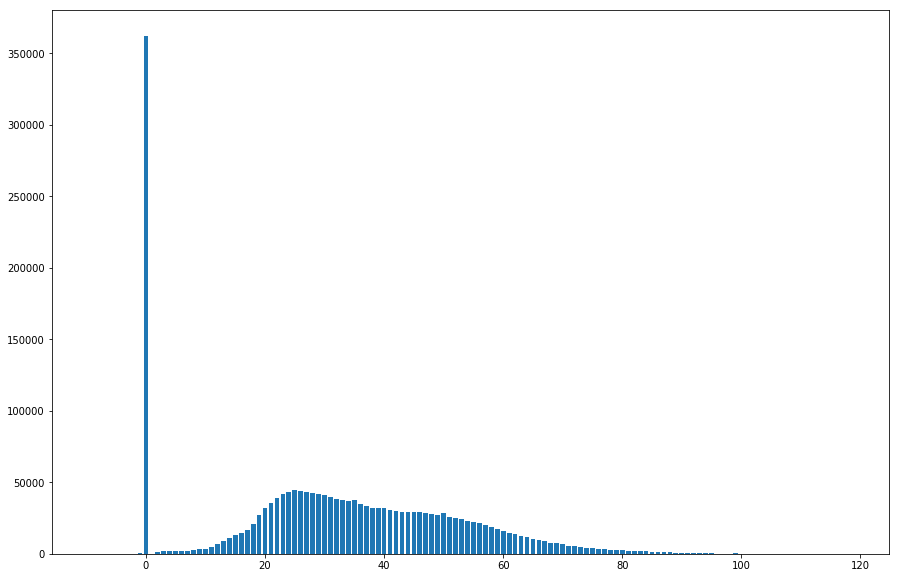

In [215]:
# Quick visual inspection of the 'Victim Age' column for the above reasons ☝🏾
data = crime_df['Victim Age'].value_counts()
names = list(data.index)
fig, axs = plt.subplots(figsize=(15, 10))
axs.bar(names, data)

plt.show()

In [162]:
# Ages with negative numbers exactly 9 😰
# it probalby refers to an unborn victim (pregnancy stage of victim's mother)?
crime_df[crime_df['Victim Age'] < 0].groupby('Victim Age')['Victim Age'].count()


Victim Age
-9      2
-8      1
-7      4
-6     10
-5     17
-4     23
-3     51
-2    102
-1    221
Name: Victim Age, dtype: int64

In [163]:
# About the huge amount of zeros in dataset:
# coud be that in data entry process the person preparing the report
# could not leave the field blank for unknown ages?:
 #No missing values in this column
crime_df['Victim Age'].isnull().values.any(), crime_df['Victim Age'].isnull().values.sum()


(False, 0)

In [164]:
print(f"Total columns in dataset: {len(crime_df.columns)}")
print(f"Number of Columns with no missing values: {len(crime_df.dropna(axis=1).columns)}")

Total columns in dataset: 29
Number of Columns with no missing values: 16


In [165]:
print(f" Only {len(crime_df.dropna(axis=0))}\
 Rows with no missing values out of {len(crime_df)} total Rows")


 Only 19 Rows with no missing values out of 1972134 total Rows


# Mapping lat long to a zip code with helper funcion imported from diffs_latlong.py

In [166]:
# Wrapper function needed to execute the computeNearestZip script.
def zipWrapper(myDf):
    lat = myDf['lat']
    long = myDf['long']
    return computeNearestZip(lat, long)


In [167]:
# Testing computeNearestZip: it maps a pair of lat/long to its zip code
zipTester = computeNearestZip(33.8677, -84.4645)
zipTester, type(zipTester)


('30339', str)

In [47]:
# Our computeNearestZip algorithm is heavy on computer resources.
# It would probably take several weeks to run on 1.9 million rows
# Created a smaller df to test its functionality
latlong1k_df = crime_df[['lat','long']][:1000]
latlong1k_df.tail(2)


,lat,long
998,34.0376,-118.2594
999,34.0516,-118.2561


In [48]:
# Function to test the time it takes for our computeNearestzip function to run
def timer():
    begining = time.time()
    latlong1k_df['zip'] = latlong1k_df.apply(func=zipWrapper, axis=1)
    end = time.time()
    total = end-begining
    print(f"It took {total} seconds to process {len(latlong1k_df['zip'])} Rows")
          

In [96]:
#15'
timer()

It took 69.20011687278748 seconds to process 1000 Rows


In [44]:
#13'
timer()

It took 149.5450189113617 seconds to process 1000 Rows


In [52]:
# Create new df of 10k rows to use in the project
_10k_df = crime_df.sort_values(by= ['date reported formatted'], ascending=False).iloc[:10000,:]


In [63]:
_10k_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1150084 to 1420509
Data columns (total 30 columns):
date reported formatted    10000 non-null datetime64[ns]
DR Number                  10000 non-null int64
Date Reported              10000 non-null object
Date Occurred              10000 non-null object
Time Occurred              10000 non-null int64
Area ID                    10000 non-null int64
Area Name                  10000 non-null object
Reporting District         10000 non-null int64
Crime Code                 10000 non-null int64
Crime Code Description     10000 non-null object
MO Codes                   8978 non-null object
Victim Age                 10000 non-null int64
Victim Sex                 0 non-null object
Victim Descent             0 non-null object
Premise Code               10000 non-null float64
Premise Description        9999 non-null object
Weapon Used Code           3749 non-null float64
Weapon Description         3749 non-null object
Status Co

In [55]:
# Create the zip column by  applying the computeNearestzip function to it
_10k_df['zip'] = _10k_df.apply(func=zipWrapper, axis=1)


In [59]:
_10k_df.count()

date reported formatted    10000
DR Number                  10000
Date Reported              10000
Date Occurred              10000
Time Occurred              10000
Area ID                    10000
Area Name                  10000
Reporting District         10000
Crime Code                 10000
Crime Code Description     10000
MO Codes                    8978
Victim Age                 10000
Victim Sex                     0
Victim Descent                 0
Premise Code               10000
Premise Description         9999
Weapon Used Code            3749
Weapon Description          3749
Status Code                10000
Status Description         10000
Crime Code 1               10000
Crime Code 2                 775
Crime Code 3                  39
Crime Code 4                   1
Address                    10000
Cross Street                1876
location                   10000
lat                        10000
long                       10000
zip                        10000
dtype: int

In [208]:
# Inspect the new zip column
_10k_df.iloc[-2:,-5:]

,Cross Street,location,lat,long,zip
1420508,NaN,"(34.1805, -118.5975)",34.1805,-118.5975,91303
1420509,NaN,"(34.1938, -118.6044)",34.1938,-118.6044,91303


In [209]:
# Age was reported as `0` for the latest 10k crimes
_10k_df['Victim Age'].value_counts()

0    10000
Name: Victim Age, dtype: int64

# Load  (Mongo and SQL)

In [169]:
# Save the _10k_df to a csv file
#added the amount of rows to the name of the file for easy finding
_10k_df.to_csv(f"Resources/crime{_10k_df['zip'].count()}.csv", index=False)


# mongodb

In [170]:
import pymongo

In [173]:
# Setup connection to mongodb
conn = "mongodb://localhost:27017"
client = pymongo.MongoClient(conn)

# Select database and collection to use
db = client.la_crime_10k
crime_reports = db.crime_reports

In [174]:
# Convert the dataframe to dictionary format for mongo
crimeData = _10k_df.to_dict(orient='records')

In [175]:
# inspect the dictionary 
crimeData[0]

{'date reported formatted': Timestamp('2019-05-20 00:00:00'),
 'DR Number': 190113994,
 'Date Reported': '05/20/2019',
 'Date Occurred': '05/18/2018',
 'Time Occurred': 2215,
 'Area ID': 1,
 'Area Name': 'Central',
 'Reporting District': 161,
 'Crime Code': 330,
 'Crime Code Description': 'BURGLARY FROM VEHICLE',
 'MO Codes': '0329 0344',
 'Victim Age': 0,
 'Victim Sex': nan,
 'Victim Descent': nan,
 'Premise Code': 101.0,
 'Premise Description': 'STREET',
 'Weapon Used Code': nan,
 'Weapon Description': nan,
 'Status Code': 'IC',
 'Status Description': 'Invest Cont',
 'Crime Code 1': 330.0,
 'Crime Code 2': nan,
 'Crime Code 3': nan,
 'Crime Code 4': nan,
 'Address': 'GEORGIA                      ST',
 'Cross Street': 'JAMES M WOOD                 BL',
 'location': '(34.0483, -118.2631)',
 'lat': 34.0483,
 'long': -118.2631,
 'zip': '90017'}

### First Collection: Data from la 10k crime df

In [176]:
crime_reports.insert_many(crimeData)


In [177]:
# Test query the mongo db
results = crime_reports.find()
for result in results[:2]:
    print(result, '\n')

{'_id': ObjectId('5ce5ddcbbe1a7708cf88d317'), 'date reported formatted': datetime.datetime(2019, 5, 20, 0, 0), 'DR Number': 190113994, 'Date Reported': '05/20/2019', 'Date Occurred': '05/18/2018', 'Time Occurred': 2215, 'Area ID': 1, 'Area Name': 'Central', 'Reporting District': 161, 'Crime Code': 330, 'Crime Code Description': 'BURGLARY FROM VEHICLE', 'MO Codes': '0329 0344', 'Victim Age': 0, 'Victim Sex': nan, 'Victim Descent': nan, 'Premise Code': 101.0, 'Premise Description': 'STREET', 'Weapon Used Code': nan, 'Weapon Description': nan, 'Status Code': 'IC', 'Status Description': 'Invest Cont', 'Crime Code 1': 330.0, 'Crime Code 2': nan, 'Crime Code 3': nan, 'Crime Code 4': nan, 'Address': 'GEORGIA                      ST', 'Cross Street': 'JAMES M WOOD                 BL', 'location': '(34.0483, -118.2631)', 'lat': 34.0483, 'long': -118.2631, 'zip': '90017'} 

{'_id': ObjectId('5ce5ddcbbe1a7708cf88d318'), 'date reported formatted': datetime.datetime(2019, 5, 20, 0, 0), 'DR Number':

## Create a second collection (census zips):

In [178]:
# Read in from census zips csv file;
# Data collected from the census api
# @ census_yelp_combined_ipynb
census_df = pd.read_csv('Resources/censusZips2017.csv')
census_df[:2]

,Zipcode,Population,Unemployment Count,Unemployment Rate
0,601,17599.0,2454.0,13.943974
1,602,39209.0,2538.0,6.473004


In [179]:
# Save df to dictionary for mongo uploading
censusData = census_df.to_dict(orient = 'records')

In [180]:
### Create the  collection to hold census data
censusZips = db.censusZips

In [181]:
censusZips.insert_many(censusData)

In [182]:
## Test query the mongodb new collection
censusResults = censusZips.find()

In [183]:
for result in censusResults[:2]:
    print(result, '\n')

{'_id': ObjectId('5ce5df1bbe1a7708cf88fa27'), 'Zipcode': 601, 'Population': 17599.0, 'Unemployment Count': 2454.0, 'Unemployment Rate': 13.943974089436901} 

{'_id': ObjectId('5ce5df1bbe1a7708cf88fa28'), 'Zipcode': 602, 'Population': 39209.0, 'Unemployment Count': 2538.0, 'Unemployment Rate': 6.473003647121835} 



#  SQL

In [184]:
from sqlalchemy import create_engine

In [185]:
database_path = "Resources/la_crime_10k.sqlite"

In [186]:
engine = create_engine(f"sqlite:///{database_path}")

In [187]:
engine.table_names()

[]

In [188]:
_10k_df.to_sql(name='LaCrime', con=engine, if_exists='append', index=False)


In [190]:
engine.table_names()

['LaCrime']

In [210]:
# Test Query the LaCrime table
pd.read_sql_query('select * from LaCrime', con=engine).tail(2)


,date reported formatted,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,...,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,location,lat,long,zip
9998,2019-05-03 00:00:00.000000,192109540,05/03/2019,05/03/2019,1413,21,Topanga,2158,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,442.0,NaN,NaN,NaN,6100 CANOGA AV,None,"(34.1805, -118.5975)",34.1805,-118.5975,91303
9999,2019-05-03 00:00:00.000000,192109542,05/03/2019,05/03/2019,1015,21,Topanga,2156,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,442.0,NaN,NaN,NaN,21900 VANOWEN ST,None,"(34.1938, -118.6044)",34.1938,-118.6044,91303


## Create a second Table (census zips):

In [192]:
# Import data for the census table
censusData = pd.read_csv('Resources/censusZips2017.csv')


In [193]:
censusData[:2]


,Zipcode,Population,Unemployment Count,Unemployment Rate
0,601,17599.0,2454.0,13.943974
1,602,39209.0,2538.0,6.473004


In [194]:
# check tables
engine.table_names()


['LaCrime']

In [195]:
# Create the new CensusZips table 
censusData.to_sql(name='CensusZips', con=engine, if_exists='append', index=False)


In [196]:
engine.table_names()


['CensusZips', 'LaCrime']

### Test Query the CensusZips table

In [197]:
pd.read_sql_query('select * from CensusZips', con=engine).tail()


,Zipcode,Population,Unemployment Count,Unemployment Rate
33115,99923,0.0,0.0,NaN
33116,99925,901.0,124.0,13.762486
33117,99926,1684.0,132.0,7.838480
33118,99927,59.0,0.0,0.000000
33119,99929,2455.0,83.0,3.380855


# Test Query both tables  performing a join on the zip code

In [241]:
query1 = '''
SELECT
    LaCrime.zip, COUNT(LaCrime.zip) AS crime_reports_count, `Unemployment Rate` AS `zip_unemployment_%`
FROM
    LaCrime JOIN CensusZips ON LaCrime.zip = CensusZips.Zipcode
GROUP BY
    LaCrime.zip ORDER by count(LaCrime.zip) DESC
'''

query2 = '''
SELECT
    LaCrime.zip, COUNT(LaCrime.zip) AS crime_reports_count, `Unemployment Rate` AS `zip_unemployment_%`
FROM
    LaCrime JOIN CensusZips ON LaCrime.zip = CensusZips.Zipcode
GROUP BY
    LaCrime.zip ORDER BY `Unemployment Rate`DESC
'''

In [250]:
# 10k most recent crimes database
pd.read_sql_query(query1, con=engine)


,zip,crime_reports_count,zip_unemployment_%
0,90003,322,5.440488
1,90028,281,7.834739
2,90037,261,4.558968
3,90057,218,4.946446
4,90011,197,3.659383
5,90062,192,4.130609
6,90013,190,6.832818
7,91402,182,4.867002
8,90007,174,5.885350
9,90029,170,5.125763


In [251]:
# 10k most recent crimes database
pd.read_sql_query(query2, con=engine)


,zip,crime_reports_count,zip_unemployment_%
0,90028,281,7.834739
1,91602,59,6.888725
2,90013,190,6.832818
3,90068,22,6.558962
4,90043,98,6.531153
5,90021,89,6.396453
6,90047,112,6.042358
7,91403,58,6.009645
8,90007,174,5.885350
9,90301,4,5.863852
